# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%matplotlib inline
import statsmodels.api as sm


In [3]:
# Your code here. 
student_data = pd.DataFrame({'X':[17, 51,27,21,36,48,19,26,54,30],'Y':[10,1,5,9,4,2,9,6,0,2]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,2


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='X', ylabel='Y'>

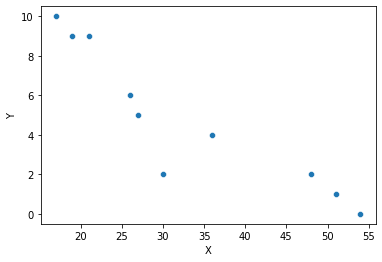

In [7]:
# Your code here.
sns.scatterplot(data = student_data, x=student_data['X'], y=student_data['Y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
# the younger the more incidence of lateness

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [31]:
covariance = np.cov(student_data['X'], student_data['Y'])
covariance

corr = np.corrcoef((student_data['X'], student_data['Y']))
corr


array([[ 1.        , -0.91369688],
       [-0.91369688,  1.        ]])

These functions draw similar plots, but regplot() is an axes-level function, and lmplot() is a figure-level function. Additionally, regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas.Series objects, or as references to variables in a pandas.DataFrame object passed to data. In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. Finally, only lmplot() has hue as a parameter.

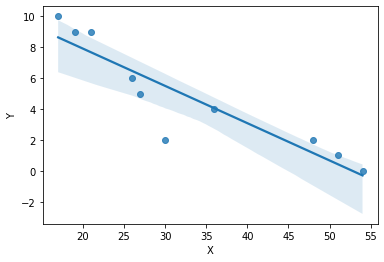

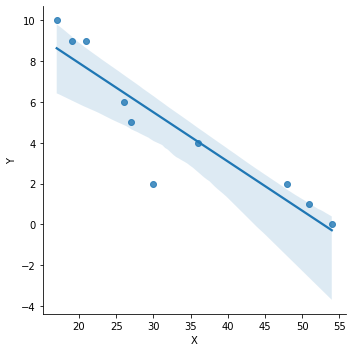

In [16]:
# Your response here.
# sns.lmplot(x=student_data['X'].to_numpy(), y=student_data['Y'].to_numpy(), data=student_data)
sns.regplot(x=student_data['X'], y=student_data['Y'])
sns.lmplot(x='X',y='Y', data=student_data )

# These functions draw similar plots, but regplot() is an axes-level function, and lmplot() is a figure-level function.

In [22]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x=student_data['X'], y=student_data['Y'])
print(slope, intercept)



-0.24110367694949372 12.732310971638343


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [41]:
# Your response here.
import statsmodels.api as sm
X = student_data['X'].to_list()
Y = student_data['Y'].to_list()
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
predictions = list(results.predict(X))
predictions


[8.633548463496947,
 0.43602344721416486,
 6.222511694002011,
 7.669133755698972,
 4.052578601456569,
 1.1593344780626467,
 8.15134110959796,
 6.463615370951505,
 -0.28728758363431517,
 5.49920066315353]

Plot your regression model on your scatter plot.

In [44]:
X = student_data['X'].to_list()

<AxesSubplot:xlabel='X', ylabel='Y'>

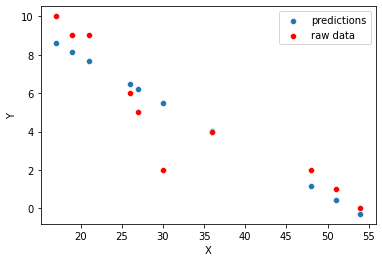

In [47]:
# Your code here.
sns.scatterplot(x=X, y=predictions, label='predictions')
sns.scatterplot(data = student_data, x=student_data['X'], y=student_data['Y'], color ='r', label = 'raw data')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [51]:
# Your response here. 
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(Y, predictions)
coefficient_of_dermination

# the score is relatively high - 83%

0.8348419834509682

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [53]:
# Import any libraries you may need & the data

vehicles = pd.read_csv('../dev/DAFT_0116_forked/module_2/Lab_16_Linear-Regression/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

<AxesSubplot:>

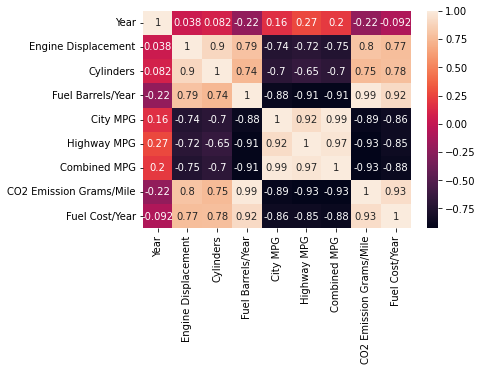

In [69]:
sns.heatmap(vehicles.corr(),annot=True)
# most correlated = Fuel Barrels/ Year and Fuel Cost/Year

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [70]:
# Your response here. 
# X = vehicles.groupby('Year').sum()
X = vehicles[['Year','Cylinders','Fuel Barrels/Year', 'Fuel Cost/Year', 'Combined MPG' ]]
# X_without_Year = vehicles[['Cylinders','Fuel Barrels/Year', 'Fuel Cost/Year', 'Combined MPG', 'CO2 Emission Grams/Mile' ]]
# X_without_Year = vehicles[['Cylinders','Fuel Barrels/Year', 'Fuel Cost/Year', 'Combined MPG', 'CO2 Emission Grams/Mile' ]]
Y = vehicles['CO2 Emission Grams/Mile']

In [73]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [72]:
results.summary()

# so the most related are Fuel Barrels/Year
# R2 is 98% ==> model is good at predicting the CO2 emissions

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                             16:42:42   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
# Your response here. 
predictions = results.predict(X)
predictions

0        522.030384
1        671.001053
2        552.684951
3        670.680436
4        570.340582
            ...    
35947    230.654658
35948    230.334041
35949    230.013424
35950    229.692808
35951    239.332836
Length: 35952, dtype: float64

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [85]:
# Your code here. 
party = pd.DataFrame({'X':[1,3,4,6,8,9,11,14],'Y':[1,2,4,4,5,7,8,13]})
party['X'].corr(party['Y'])
party


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

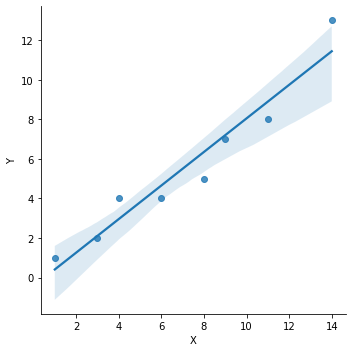

In [88]:
# Your code here.
X = party['X'].to_list()
Y = party['Y'].to_list()

sns.lmplot(x='X', y='Y', data=party)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 